In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import logisticRegression
# importlib.reload()

In [3]:
X_blue = np.linspace(5, 8, 50).reshape(50, 1)
X_red = np.linspace(7, 10, 50).reshape(50, 1)
X = np.concatenate((X_blue, X_red))
X_ones = np.concatenate((X, np.ones(shape=(X.shape[0], 1))), axis=1)
y = np.concatenate((np.zeros(50), np.ones(50)))

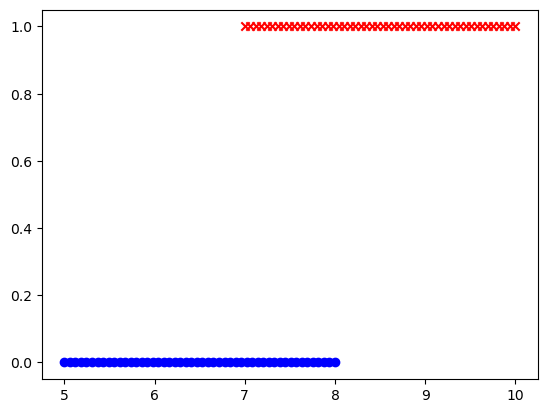

In [4]:
plt.scatter(X_blue, np.zeros(50), marker='o', color='blue')
plt.scatter(X_red, np.ones(50), marker='x', color='red')

plt.show()

In [5]:
importlib.reload(logisticRegression)

lr = logisticRegression.StochasticGradientDescent(1e-4, 1e-4)
lr.fit(X_ones, y, True)

0.005875880190553922
0.005080228107047356
0.00439530678510672
0.0038065340797684803
0.0033010799639625376
0.0028677696055558317
0.00249693470261712
0.0021802449549314204
0.001910537206022314
0.0016816510539769474
0.0014882748532235963
0.00132580386676395
0.001190212100020352
0.0010779403216148716
0.0009858039780721254
0.000910924890250555
0.0008506887240592372
0.0008027262298457428
0.0007649116173737706
0.0007353684739271734
0.000712473883269884
0.0006948545433242064
0.0006813729235457259
0.0006711049713995592
0.0006633126502736905
0.000657414790062435
0.0006529589979073214
0.0006495963498836557
0.0006470596636597679
0.0006451454929344677
0.0006436995902295338
0.0006426053948397275
0.000641775046694888
0.0006411424467397058
0.0006406579404462222
0.000640284269051449
0.0006399934999343842
0.0006397647070702579
0.0006395822226323513
0.000639434321558803
0.0006393122332513749
0.0006392093998361813
0.0006391209199209419
0.0006390431317176043
0.0006389733007636925
0.0006389093860890453
0.00

In [6]:
lr.info()

array([  1.49856361, -11.14208679])

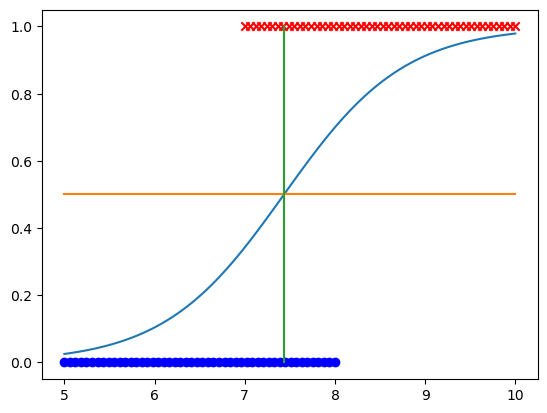

In [7]:
plt.scatter(X_blue, np.zeros(50), marker='o', color='blue')
plt.scatter(X_red, np.ones(50), marker='x', color='red')

domain = np.linspace(5, 10, 100).reshape(100, 1)
y_domain = lr.pred(np.concatenate((domain, np.ones(shape=(domain.shape[0], 1))), axis=1))
plt.plot(domain, y_domain)
plt.plot(domain, np.ones(domain.shape[0]) * 0.5)
plt.plot(-(np.ones(2)) * (lr.info()[1] / lr.info()[0]), np.array([0, 1]))

plt.show()

In [8]:
-lr.info()[1] / lr.info()[0]

7.435177714873856

In [9]:
df = pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [10]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [11]:
new_df = df.loc[:, df.columns != 'competitorname']
new_df = new_df.dropna()
new_df.drop
X_candy = np.array(new_df.loc[:, new_df.columns != 'chocolate'])
X_candy = (X_candy - np.amin(X_candy, axis=0).reshape(1, X_candy.shape[1])) / \
    ( np.amax(X_candy, axis=0).reshape(1, X_candy.shape[1]) - np.amin(X_candy, axis=0).reshape(1, X_candy.shape[1]))
y_candy = np.array(new_df.loc[:, new_df.columns == 'chocolate'])

train_count = int(X_candy.shape[0] * 0.8)

X_train = X_candy[:train_count, :]
X_test = X_candy[train_count:, :]
y_train = y_candy[:train_count, :].flatten()
y_test = y_candy[train_count:, :].flatten()

In [12]:
cake_lr = logisticRegression.StochasticGradientDescent(1e-4, 1e-4)
cake_lr.fit(X_train, y_train, True)
cake_lr.info()

0.0021505428814018075
0.002148310880772157
0.002146081558336186
0.0021438549149494788
0.0021416309514361354
0.002139409668588931
0.0021371910671694784
0.0021349751479084332
0.0021327619115056196
0.0021305513586302254
0.00212834348992098
0.002126138305986295
0.002123935807404475
0.0021217359947238285
0.002119538868462895
0.0021173444291105827
0.0021151526771263137
0.0021129636129402713
0.0021107772369534776
0.002108593549537998
0.002106412551037119
0.0021042342417654804
0.0021020586220093103
0.0020998856920264363
0.002097715452046704
0.0020955479022718737
0.0020933830428759488
0.002091220874005324
0.0020890613957788235
0.002086904608288071
0.002084750511597473
0.0020825991057444354
0.0020804503907396067
0.0020783043665669318
0.0020761610331838025
0.0020740203905213256
0.002071882438484407
0.002069747176951935
0.0020676146057769114
0.0020654847247866437
0.0020633575337829016
0.002061233032542008
0.0020591112208151042
0.002056992098328218
0.002054875664782529
0.0020527619198543448
0.00205

array([-4.23446007,  1.26569614,  0.03260935, -0.75427864,  0.59378856,
       -1.36207141,  1.13036398, -0.55781196, -0.39874844,  0.70795194,
        2.34596753])

In [13]:
y_test_pred = cake_lr.pred(X_test)
idx = y_test_pred < 0.5
y_test_pred[idx] = 0
y_test_pred[~idx] = 1

print(f'Precision: {1 - np.sum(np.abs(y_test_pred - y_test)) / y_test_pred.shape[0]}')

Precision: 0.7647058823529411
